<a href="https://colab.research.google.com/github/annine1/Machine-Learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Linear Regression
#### <center> Author : **Annine Duclaire Kenne**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the dataset

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Foundations of ML and DL/Dataset/data.xlsx')
data.head()

,X1,X2,X3,X4,Y
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
data.shape

(9568, 5)

# Standardize the data. The data will follow a standard normal distribution with mean 0 and std 1.

In [ ]:
def feature_standard(data):
  ######## write your code #########

  data_Scaled = (data - data.mean(axis=0)) / data.std(axis=0)   # axis =0 for columns


  return data_Scaled

In [ ]:
data.iloc[:, :-1] = feature_standard(data.iloc[:,:-1])
data.head()

,X1,X2,X3,X4,Y
0,-0.629486,-0.987245,1.820393,-0.009519,463.26
1,0.741870,0.681010,1.141803,-0.974570,444.37
2,-1.951195,-1.172956,-0.185068,1.289772,488.56
3,0.162197,0.237191,-0.508366,0.228148,446.48
4,-1.185007,-1.322470,-0.678435,1.596616,473.90


In [ ]:
feature_standard(data.iloc[:, :-1]).head()

,X1,X2,X3,X4
0,-0.629486,-0.987245,1.820393,-0.009519
1,0.741870,0.681010,1.141803,-0.974570
2,-1.951195,-1.172956,-0.185068,1.289772
3,0.162197,0.237191,-0.508366,0.228148
4,-1.185007,-1.322470,-0.678435,1.596616


In [ ]:
data.describe()

,X1,X2,X3,X4,Y
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03,9568.000000
mean,-6.851427e-15,-1.758375e-14,-4.731121e-13,7.452041e-15,454.365009
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,17.066995
min,-2.394001e+00,-2.277782e+00,-3.429840e+00,-3.270418e+00,420.260000
25%,-8.240528e-01,-9.888188e-01,-7.003249e-01,-6.836503e-01,439.750000
50%,9.309243e-02,-1.751513e-01,-5.372787e-02,1.141090e-01,451.550000
75%,8.143295e-01,9.627242e-01,6.736938e-01,7.890966e-01,468.430000
max,2.342681e+00,2.144667e+00,3.374584e+00,1.839077e+00,495.760000


In [ ]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

# Split the data in train and test

In [ ]:
def split_data(df, train_percent):
  ########## fill the code ########
    # METHOD 1
  np.random.seed(3)
  perm = np.random.permutation(df.index)
  n = len(df)
  train_index = int(train_percent*n)
  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  X_train = train.iloc[:, :-1]
  Y_train = train.iloc[:, -1]

  X_test = test.iloc[:, :-1]
  Y_test = test.iloc[:, -1]


  return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test =split_data(data, 0.8)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7654, 4), (1914, 4), (7654,), (1914,))

In [ ]:
Y_train.shape, Y_test.shape

((7654,), (1914,))

In [ ]:
# np.random.shuffle(data.values)
# data.head()

# Train a linear regression model

In [ ]:
X = data.iloc[:, :-1]
X.shape[0]

9568

In [ ]:
def add_ones(X):
    ###### fill the code ####

    X_new = np.hstack([np.ones((X.shape[0],1)), X])
    # X_new = np.hstack((X, np.ones(X.shape)))

    #########################


    return X_new

def compute_cost(X, y, theta):
    ######## fill the code ###########
    model = X.dot(theta)
    print(model.shape)
    loss = (1/len(y))*np.sum((model - y)**2)

    ##################################

    return loss


def Train(X, y, lr, epoch):


  m = len(y)
  X = add_ones(X.values)
  theta = np.zeros(X.shape[1])

  cost_history= np.zeros(epoch) #Creation of the store table to record the evolution of the model cost/ création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

  ######## fill the code #######

  for i in range(epoch):
    
    gradient = X.T.dot(X.dot(theta) - y)
    theta_new = theta - (1/m)*lr*gradient
    theta = theta_new

    cost_history[i] = compute_cost(X, y, theta)

  ##############################

  return  theta, cost_history
  
  
def predict(X, theta):
  ########## fill the code #########
  X = add_ones(X.values)
  yPred = X.dot(theta)


  #################################

  return yPred


def mse(y, yPred) :
    ######### fill the code ###########
    n = len(y)
    # X = add_ones(X.values)
    mse = (1/n)*np.sum( (y - yPred)**2 )

    ####################################
    return mse

In [ ]:
def r2_score(y, ypred):
  r_ss = sum( (y - ypred)**2)
  u = sum( (y - y.mean())**2 )
  r2 = 1- (r_ss/u)

  return r2

In [ ]:
compute_cost(X_train.values, Y_train.values, np.zeros(X.shape[1]))

(7654,)


206676.19716729812

In [ ]:
theta, loss_history = Train(X_train, Y_train, 0.06, 30)

(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)
(7654,)


In [ ]:
theta   # model parameters after training

array([383.34121339,  -7.65525009,  -6.78010808,   2.14753143,
         0.85460212])

In [ ]:
loss_history

array([182596.26143522, 161326.52734551, 142537.89558797, 125940.11429245,
       111277.1108536 ,  98322.90674709,  86878.0367538 ,  76766.40605799,
        67832.52854695,  59939.09778011,  52964.84887104,  46802.67520699,
        41357.96872943,  36547.15657573,  32296.41036745,  28540.50742308,
        25221.82575454,  22289.45694237,  19698.42292538,  17408.98443236,
        15386.03025937,  13598.53788823,  12019.09707326,  10623.48901686,
         9390.31462681,   8300.66611569,   7337.8368778 ,   6487.06517421,
         5735.30768018,   5071.03941155])

In [ ]:
ypred = predict(X_test, theta)
ypred

array([389.80991099, 396.62554261, 368.26914958, ..., 405.45978199,
       394.33387511, 405.12847614])

In [ ]:
mse(Y_test, ypred)

5090.09001456009

In [ ]:
r2_score(Y_test, ypred)

-16.526026001359384

Text(0, 0.5, 'Cost, $J(\\theta)$')

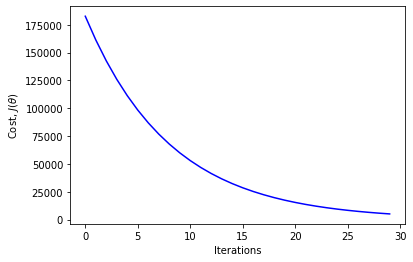

In [ ]:
epoch = 30
plt.figure()
plt.plot(np.arange(epoch), loss_history, c='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost, ' + r'$J(\theta)$')

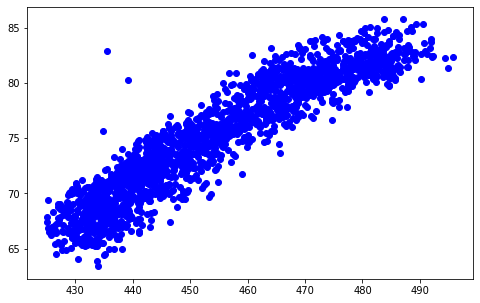

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(Y_test, ypred, c='b')

# Convert the functions into a class

# Batch gradient descent

In [ ]:
class BGD:
  ######### create your own class #########

  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch
    self.theta = None
    self.cost_history = None   # object

  @staticmethod
  def add_ones(X):
    X_new = np.hstack([np.ones((X.shape[0],1)), X])
    return X_new


  def compute_cost(self, X, y):
    model = np.dot(X, self.theta)
    #print(model.shape)
    loss = (1/len(y))*np.sum((model - y)**2)
    return loss


  def fit(self, X, y):
    m = len(y)
    X = BGD.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])

    self.cost_history= np.zeros(self.epoch) 

    for i in range(self.epoch):  
      a = X.dot(self.theta)
      b = a-y
      gradient = X.T.dot(b)
      theta_new = self.theta - (1/m)*self.lr*gradient
      self.theta = theta_new

      self.cost_history[i] = self.compute_cost(X, y)

    # return  theta, cost_history


  def predict(self, X):
    X = add_ones(X.values)
    yPred = np.dot(X, self.theta)  
    return yPred      
    
  def mse(self, y, ypred):
    n = len(y)
    mse = (1/n)*np.sum( (y - ypred)**2 )
    return mse
  def figure(self):
    plt.figure()
    print(self.epoch, len(self.cost_history)) 
    plt.plot(np.arange(self.epoch), self.cost_history, c='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost, ' + r'$J(\theta)$')

In [ ]:
bgd = BGD(0.06, 30)


30 30


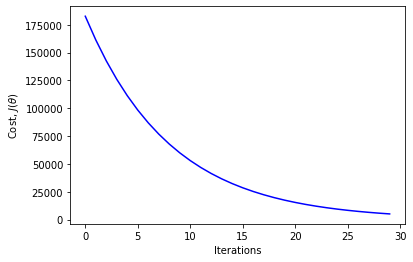

In [ ]:
bgd.fit(X_train, Y_train)
bgd.figure()

In [ ]:
y_pred = bgd.predict(X_test)
y_pred

array([389.79093713, 396.63103199, 368.27874295, ..., 405.47884511,
       394.33350416, 405.16003525])

In [ ]:
bgd.mse(Y_test, y_pred)

5090.061091749313

# STOCHASTIC GRADIENT DESCENT

In [ ]:
class SGD:
  ######### create your own class #########
  np.random.seed(5)

  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch
    self.theta = None
    self.cost_history = None   # object

  @staticmethod
  def add_ones(X):
    X_new = np.hstack([np.ones((X.shape[0],1)), X])
    return X_new


  def compute_cost(self, X, y):
    model = np.dot(X, self.theta)
    #print(y)
    # m=y.shape[0]
    loss = 1/(2)*np.sum((model - y)**2)
    return loss


  def fit(self, X, y):
    n = len(y)
    X = BGD.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])

    self.cost_history= np.zeros(self.epoch) 

    for i in range(self.epoch):  
      X_copy = np.copy(X)
      X_copy = np.insert(X_copy, -1, y, axis=1)
      # print("2222222",X_copy)
      # print('shuffling',np.randon.shuffle(X_copy))
      np.random.shuffle(X_copy)
      #print(X_copy)
      x_shuffle = X_copy[:, :-1]
      y_shuffle = X_copy[: , -1]

      for j in range(n):
        xj=x_shuffle[j].reshape(1, -1)
        yj=y_shuffle[j]
        a = xj.dot(self.theta)
        b = a -yj 
        gradient = xj.T.dot(b)
        #print(gradient)
        theta_new = self.theta - (1/n)*self.lr*gradient
        self.theta = theta_new
      c = self.compute_cost(xj, yj)
      self.cost_history[i] = c

    # return  theta, cost_history


  def predict(self, X):
    X = SGD.add_ones(X.values)
    yPred = np.dot(X, self.theta)  
    return yPred      
    
  def mse(self, y, ypred):
    n = y.shape[0]
    mse = (1/n)*np.sum( (y - ypred)**2 )
    return mse
    
  def figure(self):
    plt.figure()
    print(self.epoch, len(self.cost_history)) 
    plt.plot(np.arange(self.epoch), self.cost_history, c='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost, ' + r'$J(\theta)$')

In [ ]:
sgd = SGD(0.0001, 200)  #0.00000002111

200 200


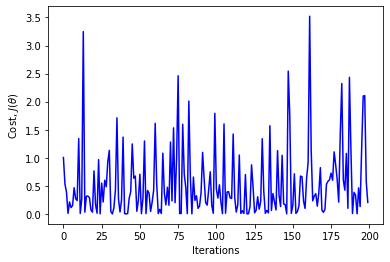

In [ ]:
sgd.fit(X_train, Y_train)
sgd.figure()

In [ ]:
ypred = sgd.predict(X_test)
ypred

array([ 0.00748068,  0.01425925, -0.01621574, ...,  0.02551187,
        0.01182357,  0.02270808])

In [ ]:
sgd.mse(Y_test, ypred)

206988.7398633116

# Mini batch gradient descent

In [ ]:
# Method 2

class MBGD:

  def __init__(self, epochs, batch_size, learning_rate):
    self.epochs = epochs
    self.batch_size = batch_size
    self.learning_rate = learning_rate

  def mini_batch_gradient_descent(self, X, y):
    np.random.seed(3)
    
    theta = np.ones(shape=(X.shape[1])) 
    theta_0 = 0
    N = X.shape[0]
    total_samples = N 
    
    if self.batch_size > total_samples: # In this case mini batch becomes same as batch GD
        batch_size = total_samples
        
    loss_list = []
    epoch_list = []
    
    num_batches = int(total_samples/self.batch_size)   # mini batch
    
    for i in range(self.epochs):    
        random_index = np.random.permutation(total_samples)
        X_rdom = X.iloc[random_index]
        y_rdom = y.iloc[random_index]
        
        for j in range(0, total_samples, self.batch_size):
            Xj = X_rdom[j:j + self.batch_size]
            yj = y_rdom[j:j + self.batch_size]
            y_predicted = np.dot(theta, Xj.T) + theta_0
            
            w_grad = (2/len(Xj))*(Xj.T.dot(y_predicted - yj))
            theta_0_grad = (2/len(Xj))*np.sum(y_predicted - yj)

            
            theta = theta - self.learning_rate * w_grad
            theta_0 = theta_0 - self.learning_rate * theta_0_grad
                
            loss = np.mean((yj-y_predicted)**2) 
        
            loss_list.append(loss)
            epoch_list.append(i)
        
    return theta, theta_0, loss, loss_list, epoch_list

  def predict(self, x_test):
    # self.theta_0 = theta_0
    self.theta=self.theta
    return np.dot(x_test, self.theta) + self.theta_0
 

  #######################
  

In [ ]:
mbgd = MBGD(epochs = 100, batch_size = 50, learning_rate= 0.0003)
theta, theta_0, cost, cost_list, epoch_list = mbgd.mini_batch_gradient_descent(X_train, Y_train)
print(theta,'\n')
print(theta_0,'\n')
print(cost, '\n')
print(cost_list,'\n')
print(epoch_list)

X1   -11.397049
X2    -5.470411
X3     0.969800
X4    -1.228837
dtype: float64 

454.29247478371843 

29.992100279855133 

[208340.92593747948, 209287.2389988946, 205467.10290775856, 201304.7093610313, 202324.27289957146, 207313.82584985363, 202140.96824307684, 204904.25687670417, 204914.57249463905, 204665.8181907088, 201598.8389281736, 202134.1696530977, 201492.140276894, 205510.97546200437, 205481.48987410072, 203211.91587292388, 202944.51438375545, 201586.45889162223, 206972.42114187562, 204876.6092572361, 202121.37126683551, 203743.32926011604, 202482.9883284317, 199794.234452022, 200675.99954169526, 200332.84506006376, 203341.92156186744, 200062.0873429161, 199977.63588350703, 201836.5270265226, 200548.5362699855, 201277.56176642608, 197783.5452347541, 201231.58450291384, 198885.39303067073, 198693.5707603335, 195719.83940004106, 194778.15511027098, 195205.80696766518, 197732.8167522382, 200741.49949878306, 194201.38283449184, 196118.32594191274, 193878.60252177235, 194908.626898

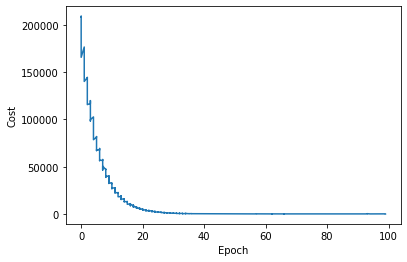

In [ ]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list, cost_list)
plt.show()

In [ ]:
# Method 2

class MBGD2:
  ######### create your own class #########

  def __init__(self, lr, epoch, batch_size):
    self.lr = lr
    self.epoch = epoch
    self.batch_size = batch_size
    self.theta = None
    self.cost_history = None   # object

  @staticmethod
  def add_ones(X):
    X_new = np.hstack([np.ones((X.shape[0],1)), X])
    return X_new


  def compute_cost(self, X, y):
    model = np.dot(X, self.theta)
    #print(model.shape)
    loss = (1/2)*np.sum((model - y)**2)
    return loss


  def fit(self, X, y):
    m = len(y)
    X = MBGD2.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])
    self.cost_history= np.zeros(self.epoch) 

    for i in range(self.epoch): 
      for j in range(0, m, self.batch_size):
        X_mini = X[j:j + self.batch_size, :]
        # print('000000000', X_mini)
        y_mini = y[j:j + self.batch_size] 
        # print('111111111', y_mini)

        a = X_mini.dot(self.theta)
        b = a - y_mini
        gradient = X_mini.T.dot(b)
        theta_new = self.theta - (1/m)*self.lr*gradient
        self.theta = theta_new
      self.cost_history[i] = self.compute_cost(X_mini, y_mini)

    # return  theta, cost_history


  def predict(self, X):
    X = add_ones(X.values)
    yPred = np.dot(X, self.theta)  
    return yPred      
    
  def mse(self, y, ypred):
    n = len(y)
    mse = (1/n)*np.sum( (y - ypred)**2 )
    return mse

  def figure(self):
    plt.figure()
    print(self.epoch, len(self.cost_history)) 
    plt.plot(np.arange(self.epoch), self.cost_history, c='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost, ' + r'$J(\theta)$')

100 100


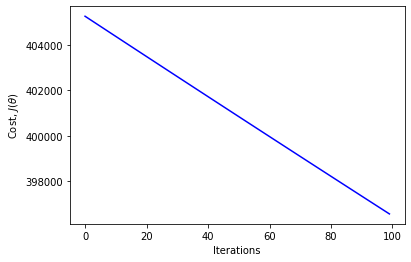

In [ ]:
mbgd = MBGD2(0.0001111, 100, 10)
mbgd.fit(X_train, Y_train)
mbgd.figure()

In [ ]:
9